# Camera-Based Queue Analysis with Person Re-Identification

This notebook demonstrates the queue analysis system that uses person re-identification to track individuals across camera views and estimate waiting times.

## 0. Download Re-Identification Model

The following cell downloads the pre-trained Re-Identification model from Google Drive. This model is used by the `QueueAnalyzer` for person re-identification.

If the file already exists in the current directory, the download will be skipped.

In [ ]:
import gdown
import os

file_id = '1yiBteqgIZoOeywE8AhGmEQl7FTVwrQmf'
output_filename = 'resnet50_msmt17_combineall_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip_jitter.pth'

if not os.path.exists(output_filename):
    print(f"Downloading {output_filename}...")
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output_filename, quiet=False)
    print(f"{output_filename} downloaded successfully.")
else:
    print(f"{output_filename} already exists. Skipping download.")

Downloading...
From (original): https://drive.google.com/uc?id=1yiBteqgIZoOeywE8AhGmEQl7FTVwrQmf
From (redirected): https://drive.google.com/uc?id=1yiBteqgIZoOeywE8AhGmEQl7FTVwrQmf&confirm=t&uuid=30533405-daee-42c3-8455-c531c7f71663
To: d:\UNI\Computer Vision\computer-vision-portfolio-1\exercise_2_queue_analysis\resnet50_msmt17_combineall_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip_jitter.pth
100%|██████████| 128M/128M [00:19<00:00, 6.43MB/s] 

resnet50_msmt17_combineall_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip_jitter.pth downloaded successfully.


## 1. Import Dependencies

In [2]:
# magic for autoreloading of modules
%reload_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
import torch

from utils.video_processing import frame_capture, generate_video
from model.queue_analyzer import QueueAnalyzer

# Check if CUDA is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


## 2. Extract Frames from Video

In [3]:
video_path = 'first-video.mp4'

print(f"Extracting frames from {video_path}...")
frames = frame_capture(video_path, frames_per_second=10)
print(f"Extracted {len(frames)} frames from the video.")

Extracting frames from first-video.mp4...
Extracted 767 frames from the video.


## 3. Visualize a Sample Frame with Queue Boundaries

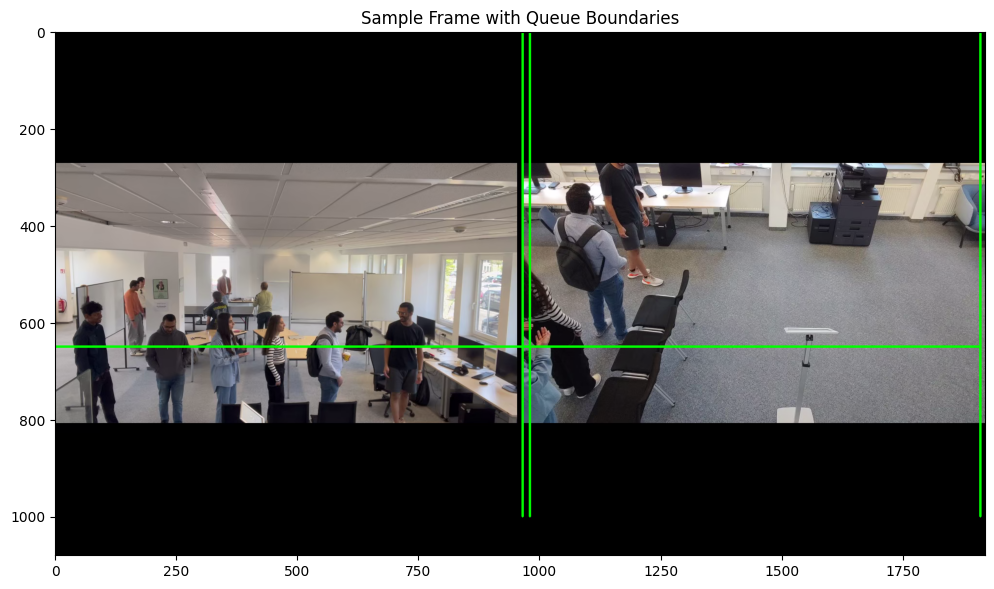

In [4]:
sample_frame = frames[0].copy()
sample_frame = cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB)

# Draw queue boundaries
sample_frame = cv2.line(sample_frame, (965, 1000), (965, 0), (0, 255, 0), 3)
sample_frame = cv2.line(sample_frame, (980, 1000), (980, 0), (0, 255, 0), 3)
sample_frame = cv2.line(sample_frame, (1910, 1000), (1910, 0), (0, 255, 0), 3)
sample_frame = cv2.line(sample_frame, (0, 650), (1910, 650), (0, 255, 0), 3)

plt.figure(figsize=(12, 8))
plt.imshow(sample_frame)
plt.title("Sample Frame with Queue Boundaries")
plt.show()

## 4. Initialize Queue Analyzer

In [5]:
analyzer = QueueAnalyzer(
    yolo_model_path='yolov3u.pt',
    reid_model_name='resnet50',
    reid_model_path='resnet50_msmt17_combineall_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip_jitter.pth',
    device=device
)

Model: resnet50
- params: 23,508,032
- flops: 2,669,150,208
Successfully loaded pretrained weights from "resnet50_msmt17_combineall_256x128_amsgrad_ep150_stp60_lr0.0015_b64_fb10_softmax_labelsmooth_flip_jitter.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


## 5. Process Video Frames

In [6]:
output_folder = 'output_frames'
os.makedirs(output_folder, exist_ok=True)

# Process all frames
# Note: This will display each processed frame. Set display_results=False to disable visualization
processed_frames = analyzer.process_video(frames, output_folder=output_folder, display_results=False)


0: 384x640 9 persons, 213.5ms
Speed: 12.3ms preprocess, 213.5ms inference, 438.3ms postprocess per image at shape (1, 3, 384, 640)
conf 0.88717556
area 21648
aspect_ratio 2.795454227789292 width 88 height 246
best_score -1
person_id aebc7ea2-a0d8-4d2e-a55e-c97fa2497213
queue_order_dict {'aebc7ea2-a0d8-4d2e-a55e-c97fa2497213': 676}
conf 0.8708207
area 33500
aspect_ratio 1.8656715025618282 width 134 height 250
best_score 0.8583595156669617
person_id aebc7ea2-a0d8-4d2e-a55e-c97fa2497213
queue_order_dict {'aebc7ea2-a0d8-4d2e-a55e-c97fa2497213': 1122}
conf 0.86991936
area 21600
aspect_ratio 2.3437497558594003 width 96 height 225
best_score 0.45478978753089905
person_id f7c03b48-b67d-4cfb-837d-42e1d695a055
queue_order_dict {'aebc7ea2-a0d8-4d2e-a55e-c97fa2497213': 1122, 'f7c03b48-b67d-4cfb-837d-42e1d695a055': 185}
conf 0.8296037
area 24444
aspect_ratio 2.5979378765012497 width 97 height 252
best_score 0.6522252559661865
person_id 12c76b78-6092-4eb9-b747-d2765c8dc209
queue_order_dict {'aebc7e

d:\UNI\Computer Vision\computer-vision-portfolio-1\exercise_2_queue_analysis\model\reid.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  person_features = F.normalize(torch.tensor(person_features), p=2, dim=1).cpu().numpy()[0]  # shape: (512,)


Speed: 2.6ms preprocess, 24.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)
conf 0.89692926
area 22295
aspect_ratio 2.6923073964497366 width 91 height 245
best_score 0.9813022017478943
person_id aebc7ea2-a0d8-4d2e-a55e-c97fa2497213
queue_order_dict {'aebc7ea2-a0d8-4d2e-a55e-c97fa2497213': 673}
conf 0.872244
area 21792
aspect_ratio 2.364583087022595 width 96 height 227
best_score 0.9865686893463135
person_id f7c03b48-b67d-4cfb-837d-42e1d695a055
queue_order_dict {'aebc7ea2-a0d8-4d2e-a55e-c97fa2497213': 673, 'f7c03b48-b67d-4cfb-837d-42e1d695a055': 188}
conf 0.8633377
area 33516
aspect_ratio 1.894736699643857 width 133 height 252
best_score 0.9484395384788513
person_id aebc7ea2-a0d8-4d2e-a55e-c97fa2497213
queue_order_dict {'aebc7ea2-a0d8-4d2e-a55e-c97fa2497213': 1123, 'f7c03b48-b67d-4cfb-837d-42e1d695a055': 188}
conf 0.8349631
area 24598
aspect_ratio 2.561224228446507 width 98 height 251
best_score 0.9732912182807922
person_id 12c76b78-6092-4eb9-b747-d2765c8dc209
queue

## 6. Generate Output Video

In [7]:
print("Generating output video...")
output_video = generate_video(output_folder, 'queue_analysis_result.mp4', frame_rate=10)
print(f"Video generated successfully: {output_video}")

Generating output video...
Video generated successfully: queue_analysis_result.mp4
